# Comparison of different thermodynamic and empirical models for mantle melting

**Before any calculations can be run** users need to download the alphaMELTS for MATLAB files (https://magmasource.caltech.edu/gitlist/MELTS_Matlab.git/) and store them locally on their computer. These files then need to be added to the Python path by using the $sys.path.append()$ command below.

Additionally, much of the code presented here represents calculations performed using MAGEMin, not alphaMELTS for Python. As a result, please ensure that you've followed the instructions for installing MAGEMin and pyMAGEMINcalc before trying to recreate these calculations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PetThermoTools as ptt

# import sys
# sys.path.append(r"MELTS")

ptt.__version__

'0.2.38'

In [3]:
# used to suppress MELTS outputs in MacOS systems (run twice)
import os
import sys
sys.stdout = open(os.devnull, 'w')
sys.stderr = open(os.devnull, 'w')

In [4]:
Results = ptt.AdiabaticDecompressionMelting(Model = "Weller2024", bulk = "KLB-1",
            Tp_C = 1320.0, P_start_bar = 30000.0, P_end_bar = 2000.0, dp_bar = 333.3)

(<Figure size 500x800 with 1 Axes>,
 <Axes: xlabel='Mass (g)', ylabel='Pressure (bars)'>)

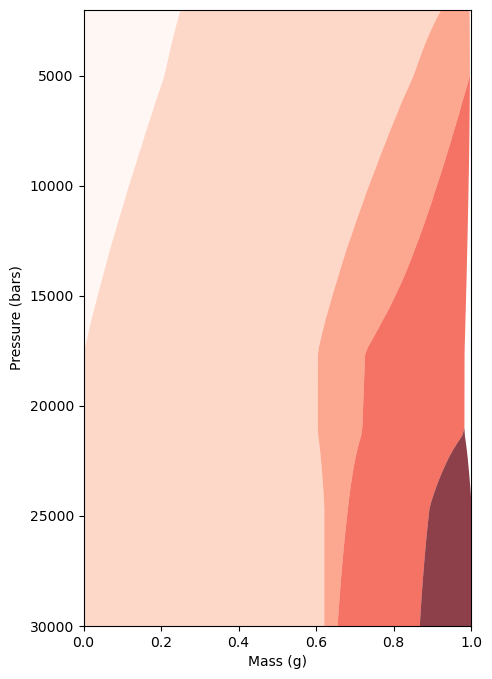

In [5]:
ptt.phase_plot(Results = Results, cmap="Reds", figsize=(3,5))

In [7]:
Results_pMELTS = ptt.AdiabaticDecompressionMelting(Model = "pMELTS", bulk = "KLB-1",
                                                Tp_C = 1400.0, P_start_bar = 45000.0, P_end_bar = 18000.0, dp_bar = 333.3)

In [8]:
Results_Holland = ptt.AdiabaticDecompressionMelting(Model = "Green2025", bulk = "KLB-1",
                                                Tp_C = 1400.0, P_start_bar = 45000.0, P_end_bar = 18000.0, dp_bar = 333.3)

(0.0, 1.0)

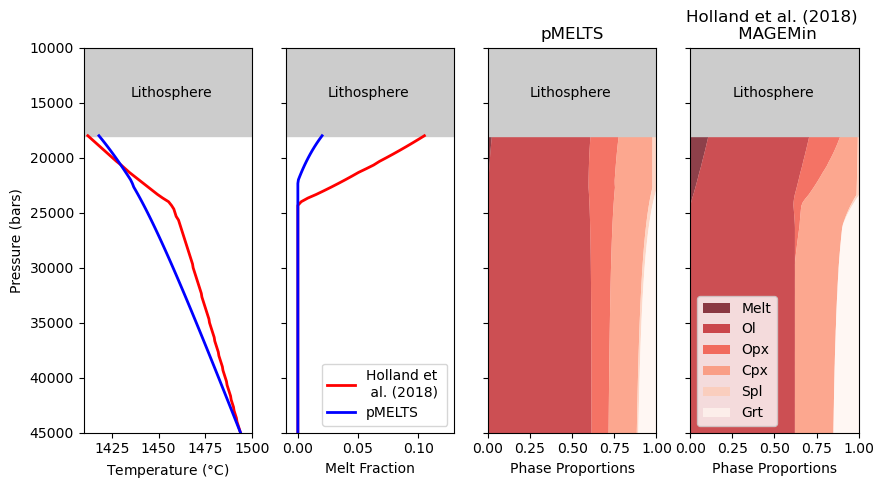

In [16]:
f, a = plt.subplots(1,4, figsize = (10,5), sharey = True)
a[0].set_ylim([45000, 10000])
a[0].set_ylabel('Pressure (bars)')

a[0].plot(Results_Holland['All']['T_C'],
        Results_Holland['All']['P_bar'], '-r', lw = 2)
a[0].plot(Results_pMELTS['All']['T_C'],
        Results_pMELTS['All']['P_bar'], '-b', lw = 2)
a[0].set_xlabel('Temperature ($\degree$C)')

a[1].plot(Results_Holland['All']['mass_Liq'],
        Results_Holland['All']['P_bar'], '-r', lw = 2, label = "Holland et \n al. (2018)")
a[1].plot(Results_pMELTS['All']['mass_Liq'],
        Results_pMELTS['All']['P_bar'], '-b', lw = 2, label = "pMELTS")
a[1].set_xlabel("Melt Fraction")
a[1].legend(loc = "lower right")

from matplotlib import cm
c = cm.get_cmap('Reds', 6)
x = c(np.arange(0,1,1/6))

Phases = {'liquid1': x[5], 
        'olivine1': x[4],
        'orthopyroxene1': x[3], 
        'clinopyroxene1': x[2], 
        'spinel1': x[1], 
        'garnet1': x[0]}
Stop = np.zeros(len(Results_pMELTS['All']['P_bar']))
for i in Phases:
        a[2].fill_betweenx(Results_pMELTS['All']['P_bar'], 
                        Stop, 
                        x2= Stop + Results_pMELTS['Mass'][i], alpha = 0.75, color = Phases[i], lw = 0)

        Stop = Stop + Results_pMELTS['Mass'][i]

a[2].set_title("pMELTS")
a[2].set_xlabel("Phase Proportions")

Phases = {'liq1': x[5], 
        'ol1': x[4],
        'opx1': x[3], 
        'cpx1': x[2], 
        'spl1': x[1], 
        'g1': x[0]}
PhaseName = {'liq1': 'Melt', 
        'ol1': 'Ol',
        'opx1': 'Opx', 
        'cpx1': 'Cpx', 
        'spl1': 'Spl', 
        'g1': 'Grt'}
Stop = np.zeros(len(Results_Holland['All']['P_bar']))
for i in Phases:
        a[3].fill_betweenx(Results_Holland['All']['P_bar'], 
                        Stop, 
                        x2= Stop + Results_Holland['Mass'][i], alpha = 0.75, color = Phases[i], lw = 0, label = PhaseName[i])

        Stop = Stop + Results_Holland['Mass'][i]

a[3].legend(loc = "lower left")
a[3].set_title("Holland et al. (2018) \n MAGEMin")
a[3].set_xlabel("Phase Proportions")


a[0].fill([1410,1500,1500,1410],[18000,18000,10000,10000], c = [0.8,0.8,0.8])
a[0].text(1435,14500, 'Lithosphere')
a[0].set_xlim([1410,1500])

a[1].fill([-0.1,1.1,1.1,-0.1],[18000,18000,10000,10000], c = [0.8,0.8,0.8])
a[1].text(0.025,14500, 'Lithosphere')
a[1].set_xlim([-0.01,0.13])

a[2].fill([-0.1,1.1,1.1,-0.1],[18000,18000,10000,10000], c = [0.8,0.8,0.8])
a[2].text(0.25,14500, 'Lithosphere')
a[2].set_xlim([0,1])

a[3].fill([-0.1,1.1,1.1,-0.1],[18000,18000,10000,10000], c = [0.8,0.8,0.8])
a[3].text(0.25,14500, 'Lithosphere')
a[3].set_xlim([0,1])

# f.savefig("GalapagosMelting.svg", format='svg', dpi=1200)

In [17]:
Results_pMELTS = ptt.AdiabaticDecompressionMelting(Model = "pMELTS", bulk = "KLB-1",
                                                Tp_C = 1320.0, P_start_bar = 30000.0, P_end_bar = 2000.0, dp_bar = 333.3)

In [18]:
Results_Holland = ptt.AdiabaticDecompressionMelting(Model = "Green2025", bulk = "KLB-1",
                                                Tp_C = 1320.0, P_start_bar = 30000.0, P_end_bar = 2000.0, dp_bar = 333.3)

In [ ]:
Results_pyMelt = ptt.AdiabaticDecompressionMelting(Model = "pyMelt", bulk = "KLB-1",
                                                Tp_C = 1320.0, P_start_bar = 30000.0, P_end_bar = 2000.0, dp_bar = 333.3)

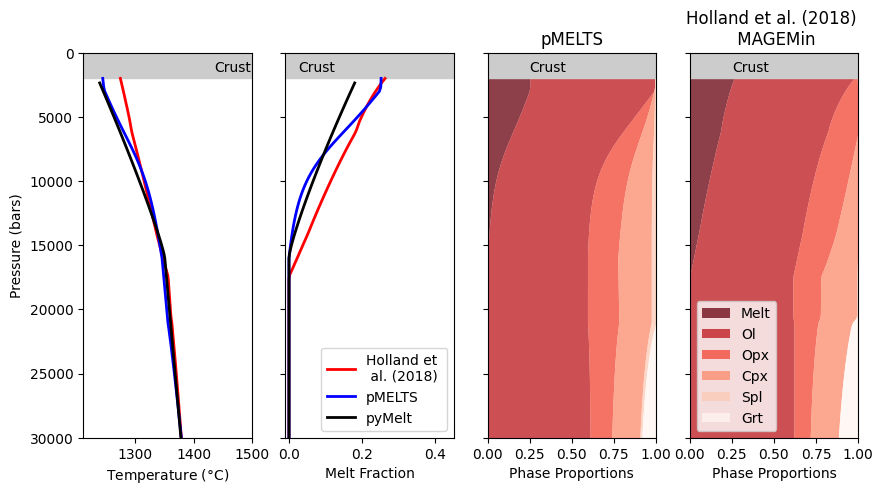

In [14]:
f, a = plt.subplots(1,4, figsize = (10,5), sharey = True)
a[0].set_ylim([30000, 0])
a[0].set_ylabel('Pressure (bars)')

a[0].plot(Results_Holland['All']['T_C'],
        Results_Holland['All']['P_bar'], '-r', lw = 2)
a[0].plot(Results_pMELTS['All']['T_C'],
        Results_pMELTS['All']['P_bar'], '-b', lw = 2)
a[0].plot(Results_pyMelt['All']['T_C'],
        Results_pyMelt['All']['P_bar'], '-k', lw = 2)
a[0].set_xlabel('Temperature ($\degree$C)')

a[1].plot(Results_Holland['All']['mass_Liq'],
        Results_Holland['All']['P_bar'], '-r', lw = 2, label = "Holland et \n al. (2018)")
a[1].plot(Results_pMELTS['All']['mass_Liq'],
        Results_pMELTS['All']['P_bar'], '-b', lw = 2, label = "pMELTS")
a[1].plot(Results_pyMelt['All']['mass_Liq'],
        Results_pyMelt['All']['P_bar'], '-k', lw = 2, label = "pyMelt")
a[1].set_xlabel("Melt Fraction")
a[1].legend(loc = "lower right")

from matplotlib import cm
c = cm.get_cmap('Reds', 6)
x = c(np.arange(0,1,1/6))

Phases = {'liquid1': x[5], 
        'olivine1': x[4],
        'orthopyroxene1': x[3], 
        'clinopyroxene1': x[2], 
        'spinel1': x[1], 
        'garnet1': x[0]}
Stop = np.zeros(len(Results_pMELTS['All']['P_bar']))
for i in Phases:
        a[2].fill_betweenx(Results_pMELTS['All']['P_bar'], 
                        Stop, 
                        x2= Stop + Results_pMELTS['Mass'][i], alpha = 0.75, color = Phases[i], lw = 0)

        Stop = Stop + Results_pMELTS['Mass'][i]

a[2].set_title("pMELTS")
a[2].set_xlabel("Phase Proportions")

Phases = {'liq': x[5], 
        'ol': x[4],
        'opx': x[3], 
        'cpx': x[2], 
        'spn': x[1], 
        'g': x[0]}
PhaseName = {'liq': 'Melt', 
        'ol': 'Ol',
        'opx': 'Opx', 
        'cpx': 'Cpx', 
        'spn': 'Spl', 
        'g': 'Grt'}
Stop = np.zeros(len(Results_Holland['All']['P_bar']))
for i in Phases:
        a[3].fill_betweenx(Results_Holland['All']['P_bar'], 
                        Stop, 
                        x2= Stop + Results_Holland['Mass'][i], alpha = 0.75, color = Phases[i], lw = 0, label = PhaseName[i])

        Stop = Stop + Results_Holland['Mass'][i]

a[3].legend(loc = "lower left")
a[3].set_title("Holland et al. (2018) \n MAGEMin")
a[3].set_xlabel("Phase Proportions")


a[0].fill([1210,1500,1500,1210],[2000,2000,0,0], c = [0.8,0.8,0.8])
a[0].text(1435,1500, 'Crust')
a[0].set_xlim([1210,1500])

a[1].fill([-0.1,1.1,1.1,-0.1],[2000,2000,0,0], c = [0.8,0.8,0.8])
a[1].text(0.025,1500, 'Crust')
a[1].set_xlim([-0.01,0.45])

a[2].fill([-0.1,1.1,1.1,-0.1],[2000,2000,0,0], c = [0.8,0.8,0.8])
a[2].text(0.25,1500, 'Crust')
a[2].set_xlim([0,1])

a[3].fill([-0.1,1.1,1.1,-0.1],[2000,2000,0,0], c = [0.8,0.8,0.8])
a[3].text(0.25,1500, 'Crust')
a[3].set_xlim([0,1])

f.savefig("RidgeMelting.svg", format='svg', dpi=1200)

In [8]:
writer = pd.ExcelWriter('Holland_melting_ridge.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
for i in Results_Holland:
    if i != "All":
        Results_Holland[i].to_excel(writer, sheet_name = i)

writer.save()